In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [201]:
df = pd.read_csv('supplement_sales.csv')

df.head(5)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [202]:
## Check Null Values
df.isnull().sum()

Date              0
Product Name      0
Category          0
Units Sold        0
Price             0
Revenue           0
Discount          0
Units Returned    0
Location          0
Platform          0
dtype: int64

In [203]:
## Trim White Spaces
df['Product Name'] = df['Product Name'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Location'] = df['Location'].str.strip()
df['Platform'] = df['Platform'].str.strip()

In [204]:
## Renaming Columns
df.rename(columns={'Product Name': 'Product_Name'}, inplace=True)
df.rename(columns={'Units Sold' : 'Units_Sold'}, inplace=True)
df.rename(columns={'Units Returned' : 'Units_Returned'}, inplace=True)

In [205]:
## Formatting Date
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date              datetime64[us]
Product_Name                 str
Category                     str
Units_Sold                 int64
Price                    float64
Revenue                  float64
Discount                 float64
Units_Returned             int64
Location                     str
Platform                     str
dtype: object

In [206]:
## Extract Year and Month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name
df['Year_Month'] = df['Date'].dt.to_period('M')

Overall Sales Trends
1. How have total sales evolved from 2020 to 2024?
2. Are there seasonal patterns in supplement sales?
3. Which months have the highest/lowest sales?
4. Is there year-over-year growth?

In [207]:
## 1. How have total sales evolved from 2020 to 2024?
## Yearly Sales
df_filtered = df[(df['Year'] >= 2020) & (df['Year'] <= 2024)].copy()

print('-' * 60)
print('1: Total Sales from 2020 to 2024')
print('-' * 60)

yearly_sales = df_filtered.groupby('Year')['Revenue'].agg(['sum', 'mean', 'std']).round(2)
yearly_sales.columns = ['Total_Revenue', 'Average_Monthly_Revenue', 'Revenue_Std_Dev']

print(yearly_sales)
print('-' * 60)

## Year Over Year Growth
yearly_sales['YoY_Growth'] = yearly_sales['Total_Revenue'].pct_change() * 100
yearly_sales['YoY_Growth'] = yearly_sales['YoY_Growth'].round(2)

print('-' * 60)
print('Year-over-Year Growth:')
print('-' * 60)
print(yearly_sales[['Total_Revenue', 'YoY_Growth']].dropna())
print('-' * 60)

------------------------------------------------------------
1: Total Sales from 2020 to 2024
------------------------------------------------------------
      Total_Revenue  Average_Monthly_Revenue  Revenue_Std_Dev
Year                                                         
2020     4323393.22                  5196.39          2177.99
2021     4294248.17                  5161.36          2211.98
2022     4372808.55                  5255.78          2213.76
2023     4470870.75                  5373.64          2111.85
2024     4429367.35                  5223.31          2235.87
------------------------------------------------------------
------------------------------------------------------------
Year-over-Year Growth:
------------------------------------------------------------
      Total_Revenue  YoY_Growth
Year                           
2021     4294248.17       -0.67
2022     4372808.55        1.83
2023     4470870.75        2.24
2024     4429367.35       -0.93
-------------

In [208]:
## 2. Are there seasonal patterns in supplement sales?
print('-' * 60)
print('2: Seasonal Patterns')
print('-' * 60)

monthly_pattern = df_filtered.groupby('Month')['Revenue'].agg(['mean', 'sum', 'std']).round(2)
monthly_pattern.columns = ['Avg_Monthly_Revenue', 'Total_Revenue', 'Revenue_Std_Dev']
monthly_pattern.index = pd.date_range('2020-01-01', periods=12, freq='ME').month_name()

print(monthly_pattern)
print('-' * 60)

------------------------------------------------------------
2: Seasonal Patterns
------------------------------------------------------------
           Avg_Monthly_Revenue  Total_Revenue  Revenue_Std_Dev
January                5073.37     1867000.90          2154.78
February               5410.25     1731278.59          2188.67
March                  5384.00     1895167.39          2230.83
April                  5016.85     1685662.30          2112.74
May                    5217.61     1920081.21          2189.71
June                   5437.14     1826877.40          2166.96
July                   5254.07     1849431.84          2140.96
August                 5233.67     1925991.58          2200.50
September              5304.87     1782437.60          2247.26
October                5159.21     1816041.16          2221.44
November               4973.84     1750791.56          2222.51
December               5475.97     1839926.51          2177.29
--------------------------------------

In [209]:
## 3. Top and Lowest Months In Terms Of Sales
print('-' * 60)
print('3: Top and Lowest Months In Terms Of Sales for 202-2024')
print('-' * 60)

# Highest months
top_months = monthly_pattern.nlargest(3, 'Total_Revenue')
print(f"Top 3 Months (Total Revenue):")
for month, data in top_months.iterrows():
    print(f"{month}: ${data['Total_Revenue']:,.2f}")

# Lowest months
bottom_months = monthly_pattern.nsmallest(3, 'Total_Revenue')
print(f"\nBottom 3 Months (Total Revenue):")
for month, data in bottom_months.iterrows():
    print(f"{month}: ${data['Total_Revenue']:,.2f}")

print('-' * 60)

------------------------------------------------------------
3: Top and Lowest Months In Terms Of Sales for 202-2024
------------------------------------------------------------
Top 3 Months (Total Revenue):
August: $1,925,991.58
May: $1,920,081.21
March: $1,895,167.39

Bottom 3 Months (Total Revenue):
April: $1,685,662.30
February: $1,731,278.59
November: $1,750,791.56
------------------------------------------------------------


In [210]:
## 4. Compound Annual Growth Rate (CAGR)
if len(yearly_sales) > 1:
    start_value = yearly_sales['Total_Revenue'].iloc[0]
    end_value = yearly_sales['Total_Revenue'].iloc[-1]
    n_years = len(yearly_sales) - 1
    
    cagr = ((end_value / start_value) ** (1/n_years) - 1) * 100
    print('-' * 60)
    print(f"4. Compound Annual Growth Rate (CAGR): {cagr:.2f}%")
    print('-' * 60)
    
    if cagr > 0:
        print('Remarks: ', end='')
        print("Positive sustained growth")
        print('-' * 60)
    else:
        print('Remarks: ', end='')
        print("Negative or stagnant growth")
        print('-' * 60)


------------------------------------------------------------
4. Compound Annual Growth Rate (CAGR): 0.61%
------------------------------------------------------------
Remarks: Positive sustained growth
------------------------------------------------------------


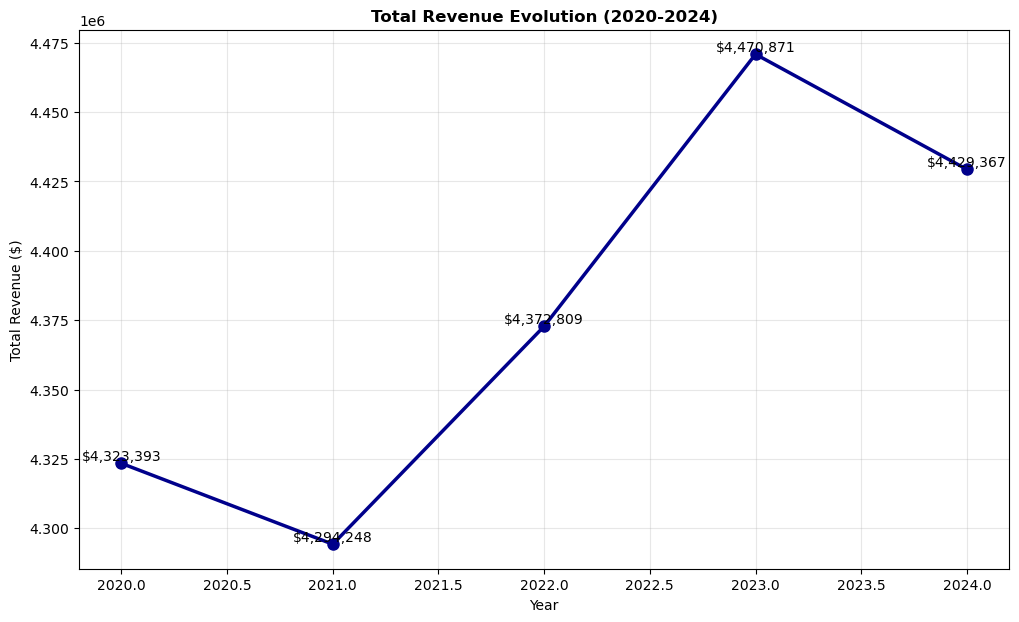

In [306]:
## Visualizations
# 1. Yearly Revenue Trend

fig, ax1 = plt.subplots(figsize=(12,7))
ax1.plot(yearly_sales.index, yearly_sales['Total_Revenue'], 
                marker='o', linewidth=2.5, markersize=8, color='darkblue')
ax1.set_title('Total Revenue Evolution (2020-2024)', fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Revenue ($)')
ax1.grid(True, alpha=0.3)


# Add value labels on points
for year, revenue in zip(yearly_sales.index, yearly_sales['Total_Revenue']):
    ax1.text(year, revenue, f'${revenue:,.0f}', ha='center', va='bottom')

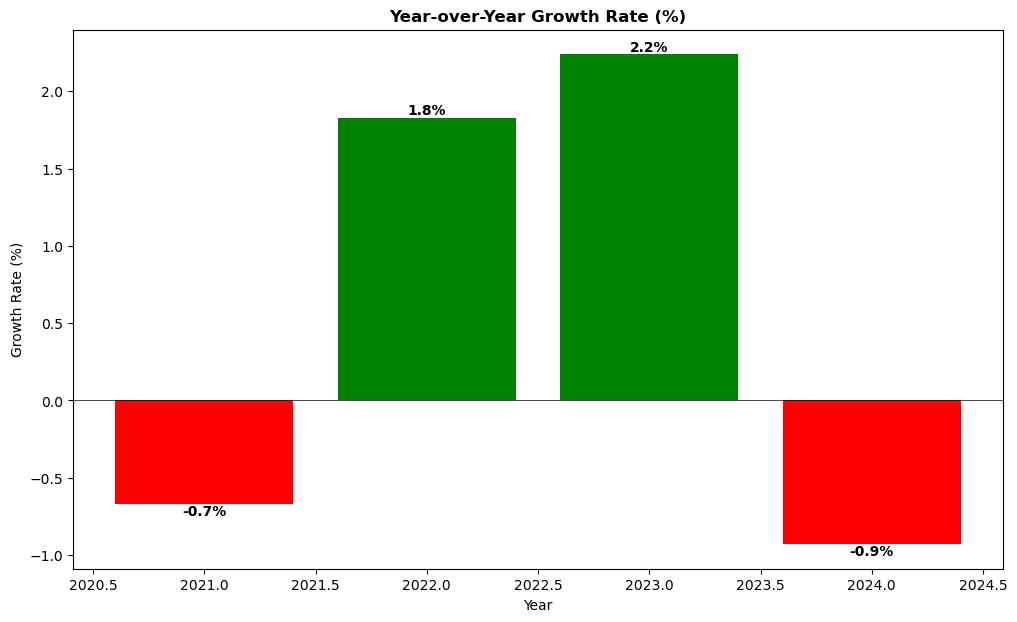

In [307]:
# 1.2. YoY Growth Rate
fig, ax2 = plt.subplots(figsize=(12,7))
ax2.bar(yearly_sales.index[1:], yearly_sales['YoY_Growth'].dropna(),
               color=['green' if x > 0 else 'red' for x in yearly_sales['YoY_Growth'].dropna()])
ax2.set_title('Year-over-Year Growth Rate (%)', fontweight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Growth Rate (%)')
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)

# Add percentage growth labels on points
for year, growth in zip(yearly_sales.index[1:], yearly_sales['YoY_Growth'].dropna()):
    ax2.text(year, growth, f'{growth:.1f}%', ha='center', va='bottom' if growth > 0 else 'top', fontweight='bold')

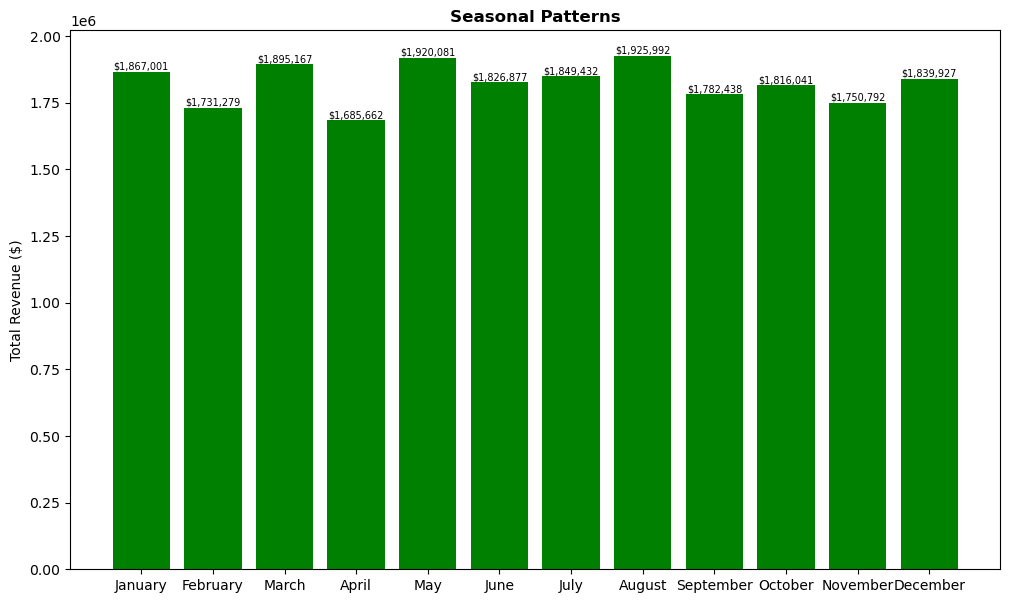

In [308]:
# 2. Seasonal Patterns
fig, ax3 = plt.subplots(figsize=(12,7))
ax3.bar(monthly_pattern.index, monthly_pattern['Total_Revenue'], color= 'green')
ax3.set_title('Seasonal Patterns', fontweight = 'bold')
ax3.set_ylabel('Total Revenue ($)')

# Add revenue labels on points
for month, revenue in zip(monthly_pattern.index, monthly_pattern['Total_Revenue']):
    ax3.text(month, revenue, f'${revenue:,.0f}', ha='center', va='bottom', fontsize=7)

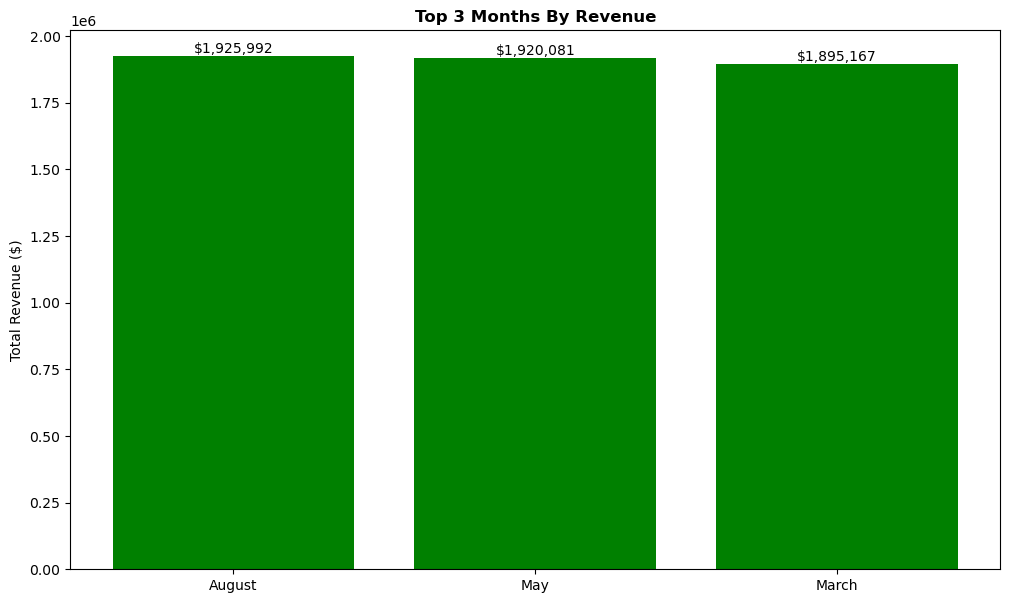

In [309]:
# 3. Top Months In Terms Of Sales
fig, ax4 = plt.subplots(figsize=(12,7))
ax4.bar(top_months.index, top_months['Total_Revenue'], color = 'green')
ax4.set_title('Top 3 Months By Revenue', fontweight = 'bold')
ax4.set_ylabel('Total Revenue ($)')

# Add revenue labels on points
for month, revenue in zip(top_months.index, top_months['Total_Revenue']):
    ax4.text(month, revenue, f'${revenue:,.0f}', ha='center', va='bottom')

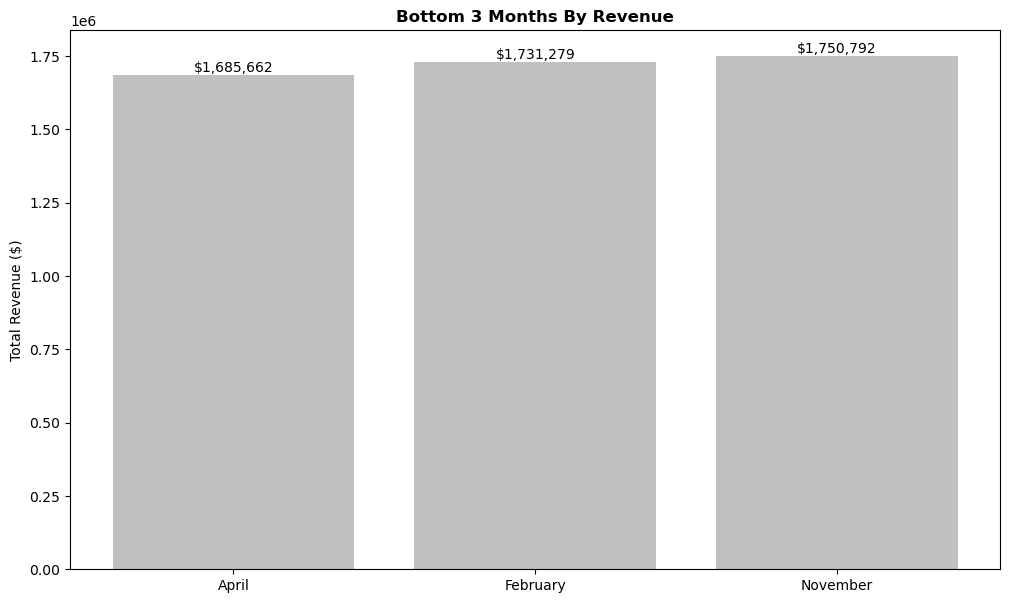

In [312]:
# 3.1 Top Months In Terms Of Sales
fig, ax5 = plt.subplots(figsize=(12,7))
ax5.bar(bottom_months.index, bottom_months['Total_Revenue'], color = 'silver')
ax5.set_title('Bottom 3 Months By Revenue', fontweight = 'bold')
ax5.set_ylabel('Total Revenue ($)')

# Add revenue labels on points
for month, revenue in zip(bottom_months.index, bottom_months['Total_Revenue']):
    ax5.text(month, revenue, f'${revenue:,.0f}', ha='center', va='bottom')

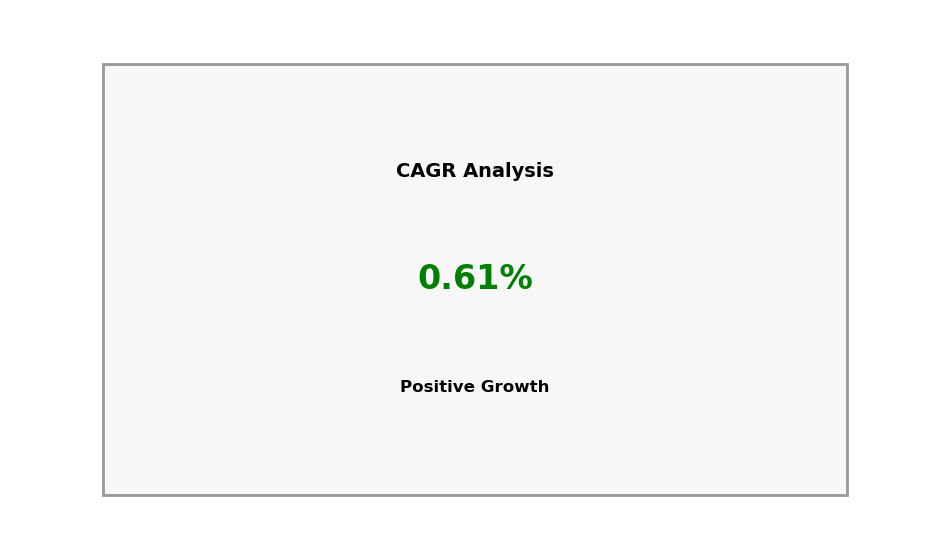

In [216]:
# 4. Compound Annual Growth Rate
fig, ax6 = plt.subplots(figsize=(12,7))
ax6.axis('off')
ax6.text(0.5, 0.7, 'CAGR Analysis', ha = 'center', va = 'center', fontsize = 14, fontweight = 'bold')
ax6.text(0.5, 0.5, f'{cagr:.2f}%', ha = 'center', va = 'center', fontsize = 24, fontweight = 'bold', 
                color='green' if cagr > 0 else 'red')
remark = "Positive Growth" if cagr > 0 else "Negative Growth"
ax6.text(0.5, 0.3, remark, ha='center', va='center', 
                fontsize=12, fontweight='bold')

rect = plt.Rectangle((0.1, 0.1), 0.8, 0.8, facecolor='whitesmoke', edgecolor='gray', linewidth=2, alpha=0.8)
ax6.add_patch(rect)
rect.set_zorder(-1)

Product Performance
1. What are the top 10 best-selling products?
2. Which products have the highest/lowest returns?


In [217]:
## 1. Top 10 best-selling products
print('-' * 60)
print('Top 10 Selling Products')
print('-' * 60)

product_sales = df_filtered.groupby('Product_Name')['Revenue'].agg(['sum', 'mean', 'std'])
product_sales.columns = ['Total_Revenue', 'Avg_Revenue', 'Revenue_Std_Dev']
top_products = product_sales.nlargest(10, 'Total_Revenue')
for rank, (product, row) in enumerate(top_products.iterrows(), start=1):
    revenue = row['Total_Revenue']
    print(f'Rank {rank}: {product} - ${revenue:,.0f}')

------------------------------------------------------------
Top 10 Selling Products
------------------------------------------------------------
Rank 1: Zinc - $1,431,414
Rank 2: Biotin - $1,424,760
Rank 3: Pre-Workout - $1,415,923
Rank 4: BCAA - $1,403,556
Rank 5: Fish Oil - $1,388,186
Rank 6: Green Tea Extract - $1,375,749
Rank 7: Creatine - $1,364,119
Rank 8: Whey Protein - $1,363,521
Rank 9: Iron Supplement - $1,358,652
Rank 10: Collagen Peptides - $1,356,098


In [218]:
## 2.1 Products with the highest returns
product_returns = df_filtered.groupby('Product_Name')['Units_Returned'].agg(['sum'])
product_returns.columns = ['Total_Returns']
high_returns = product_returns.nlargest(3, 'Total_Returns')

print('-' * 60)
print('Products with highest return rate')
print('-' * 60)
print(high_returns)

## 2.2 Products with the highest returns
product_returns = df_filtered.groupby('Product_Name')['Units_Returned'].agg(['sum'])
product_returns.columns = ['Total_Returns']
low_returns = product_returns.nsmallest(3, 'Total_Returns')

print('-' * 60)
print('Products with lowest return rate')
print('-' * 60)
print(low_returns)

------------------------------------------------------------
Products with highest return rate
------------------------------------------------------------
                    Total_Returns
Product_Name                     
Vitamin C                     430
Electrolyte Powder            420
Pre-Workout                   414
------------------------------------------------------------
Products with lowest return rate
------------------------------------------------------------
              Total_Returns
Product_Name               
Ashwagandha             370
Zinc                    373
Fish Oil                382


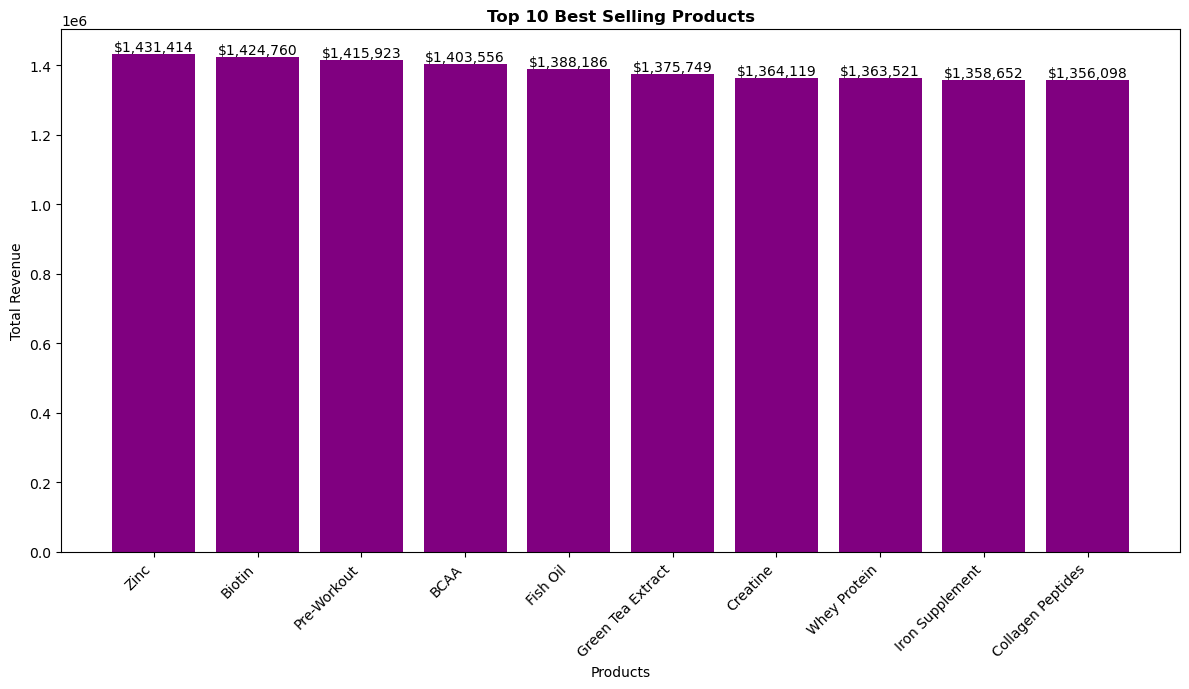

In [219]:
## Visualizations
## 1.Top 10 Best Selling Products
fig, ax7=plt.subplots(figsize=(12,7))
ax7.bar(top_products.index[:10], top_products['Total_Revenue'][:10], color='purple')
ax7.set_title('Top 10 Best Selling Products', fontweight='bold')
ax7.set_xlabel('Products')
ax7.set_ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')

#Add labels
for products, revenue in zip(top_products.index, top_products['Total_Revenue']):
    ax7.text(products, revenue, f'${revenue:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()



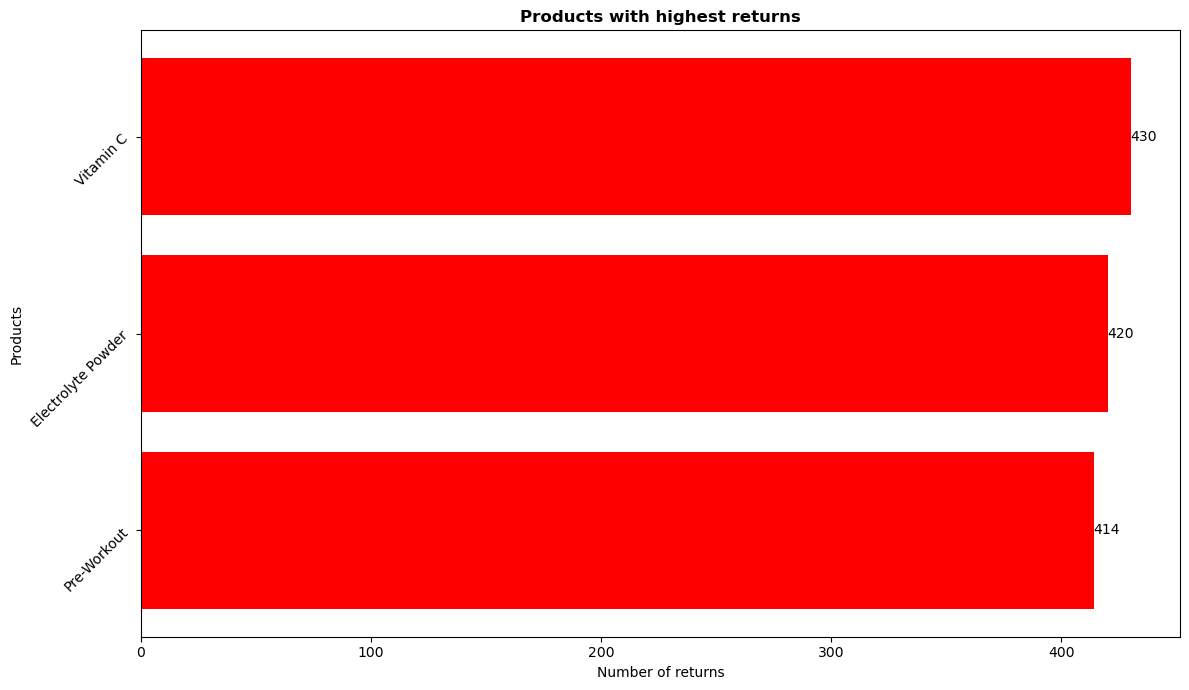

In [220]:
## Visualizations
## 2.1 Products with highest return
fig, ax8=plt.subplots(figsize=(12,7))
high_returns_sorted = high_returns.sort_values('Total_Returns', ascending=True)
ax8.barh(high_returns_sorted.index, high_returns_sorted['Total_Returns'],  color='red')
ax8.set_title('Products with highest returns', fontweight='bold')
ax8.set_xlabel('Number of returns')
ax8.set_ylabel('Products')
plt.yticks(rotation=45, ha='right')

#Add labels
for products, returns in enumerate(high_returns_sorted['Total_Returns']):
    ax8.text(returns, products, f'{returns}', ha='left', va='center')

plt.tight_layout()
plt.show()


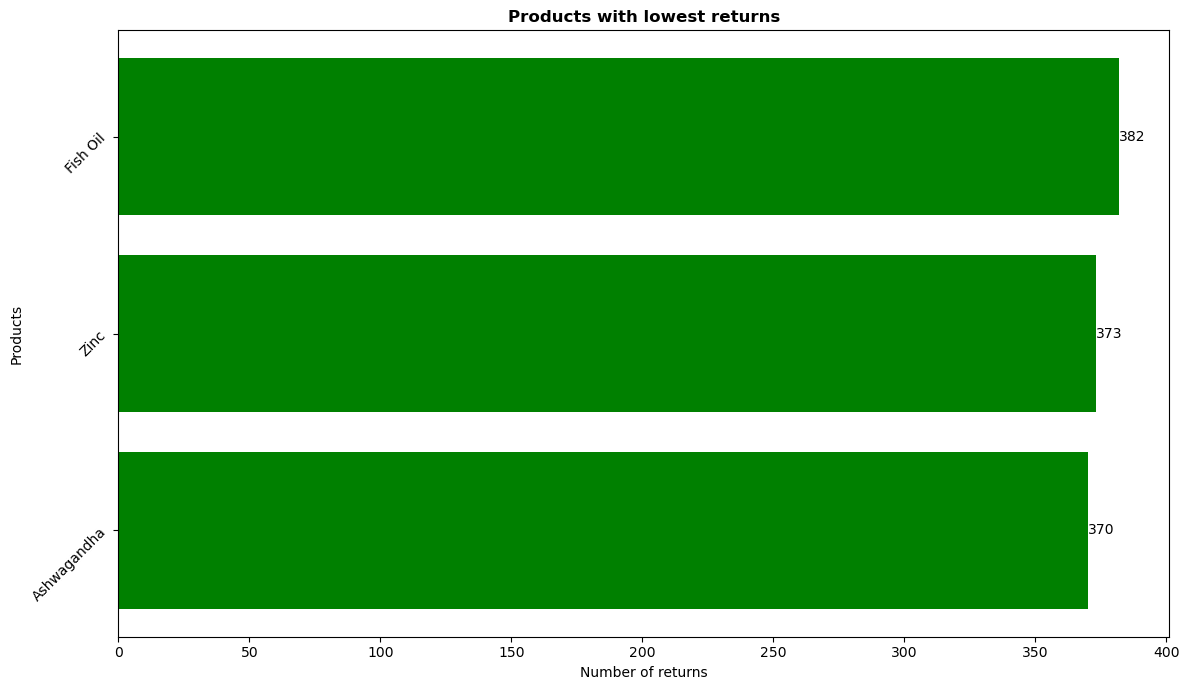

In [221]:
## Visualizations
## 2.1 Products with lowest return rates
fig, ax9=plt.subplots(figsize=(12,7))
ax9.barh(low_returns.index, low_returns['Total_Returns'],  color='green')
ax9.set_title('Products with lowest returns', fontweight='bold')
ax9.set_xlabel('Number of returns')
ax9.set_ylabel('Products')
plt.yticks(rotation=45, ha='right')

#Add labels
for products, returns in enumerate(low_returns['Total_Returns']):
    ax9.text(returns, products, f'{returns}', ha='left', va='center')

plt.tight_layout()
plt.show()


Category Insights
1. Which supplement category is most popular?
2. How do category sales trends differ?


In [222]:
## 1. Most poopular category
print('-' * 60)
print('Most Popular Category')
print('-' * 60)

popular_category = df_filtered.groupby('Category')['Units_Sold'].agg(['sum', 'mean'])
popular_category.columns = ['Total_Orders', 'Average_Orders']
top_category = popular_category.nlargest(5, 'Total_Orders')

for rank, (products, orders) in enumerate(top_category.iterrows(), start=1):
    total_orders = orders['Total_Orders']
    print(f'Rank {rank}: {products} - {total_orders:,.0f}')

------------------------------------------------------------
Most Popular Category
------------------------------------------------------------
Rank 1: Mineral - 117,698
Rank 2: Vitamin - 117,684
Rank 3: Performance - 78,616
Rank 4: Protein - 78,211
Rank 5: Herbal - 39,466


In [223]:
## 2. How do category sales trend differ?
print('-' * 60)
print('Yearly Category Trends')
print('-' * 60)

yearly_category_trends = df_filtered.groupby(['Year', 'Category'])['Revenue'].sum().unstack()
yearly_category_trends_formatted = yearly_category_trends.map(lambda x: f"${x:,.0f}")
print(yearly_category_trends_formatted)

##2.1 Top selling products per year
print('-' * 60)
print('Top selling products per year')
print('-' * 60)

yearly_category = df_filtered.groupby(['Year', 'Category'])['Revenue'].sum().unstack()
for year in yearly_category.index:
    top_category_year = yearly_category.loc[year].idxmax()
    revenue = yearly_category.loc[year].max()
    print(f'{year}: {top_category_year} - ${revenue:,.0f}')

------------------------------------------------------------
Yearly Category Trends
------------------------------------------------------------
Category Amino Acid Fat Burner    Herbal Hydration   Mineral     Omega  \
Year                                                                     
2020       $268,415   $270,257  $256,161  $257,767  $797,365  $264,884   
2021       $267,296   $263,301  $266,900  $268,222  $840,709  $274,682   
2022       $276,471   $270,648  $265,787  $266,501  $833,409  $292,303   
2023       $314,867   $274,566  $282,019  $270,402  $822,781  $255,627   
2024       $276,507   $296,977  $269,952  $278,809  $805,611  $300,691   

Category Performance   Protein Sleep Aid   Vitamin  
Year                                                
2020        $595,155  $532,154  $258,556  $822,680  
2021        $528,798  $511,124  $280,855  $792,361  
2022        $575,451  $545,579  $234,206  $812,454  
2023        $556,094  $564,268  $295,795  $834,452  
2024        $524,5

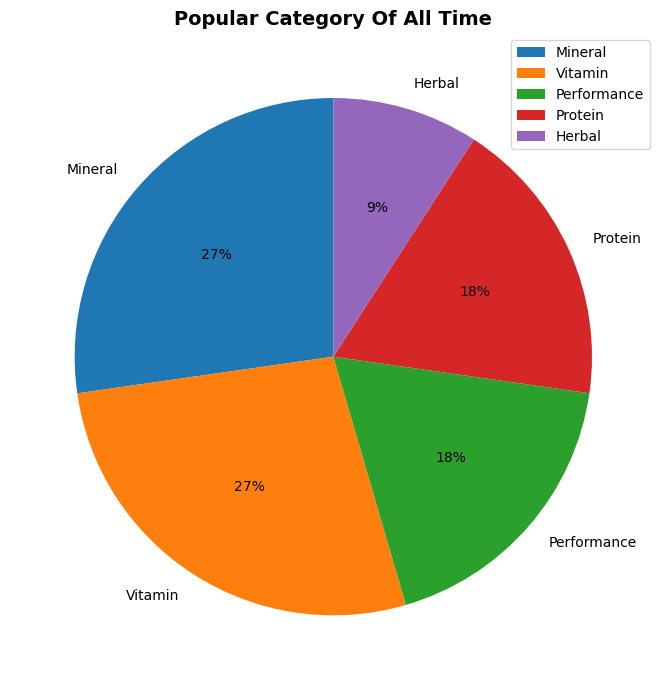

In [256]:
## Visualization
## 1. Most Popular Category
top_category.plot(kind='pie', y='Total_Orders', figsize=(12, 7), autopct='%.0f%%', startangle=90)
plt.title('Popular Category Of All Time', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



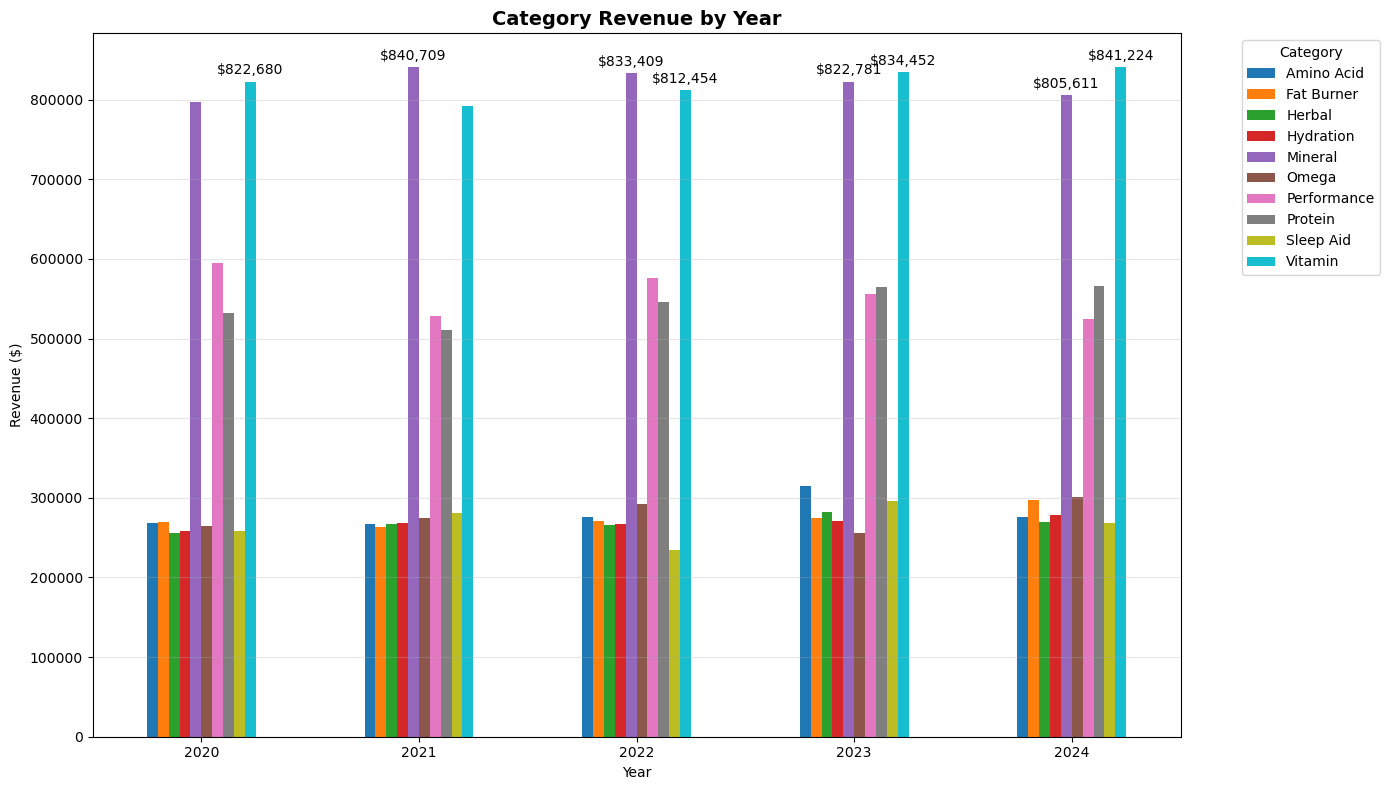

In [313]:
## 2. Yearly Catergory Trend
yearly_category_trends.plot(kind='bar', figsize=(14, 8))
plt.title('Category Revenue by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

for container in plt.gca().containers:
    plt.gca().bar_label(container, 
                       fmt=lambda x: f'${x:,.0f}' if x > 800000 else '',
                       label_type='edge', 
                       padding=3)

plt.tight_layout()
plt.show()

Geographic Performance
1. Which location (USA, UK, Canada) generates the most revenue?
2. Do product preferences vary by location?
3. Which location has the highest return rates?


In [226]:
## 1. Location that generates the most revenue
print('-' * 60)
print('Revenue Based On Location')
print('-' * 60)

location_based_revenue = df_filtered.groupby(['Location', 'Year'])['Revenue'].sum().unstack()
location_based_revenue_formatted = location_based_revenue.map(lambda x: f'${x:,.0f}')
print(location_based_revenue_formatted)

------------------------------------------------------------
Revenue Based On Location
------------------------------------------------------------
Year            2020        2021        2022        2023        2024
Location                                                            
Canada    $1,474,106  $1,423,489  $1,538,233  $1,491,895  $1,563,894
UK        $1,521,966  $1,479,046  $1,433,994  $1,572,619  $1,342,008
USA       $1,327,322  $1,391,713  $1,400,582  $1,406,357  $1,523,465


In [296]:
## 2. Product preference by location
print('-' * 60)
print('Product Preference By Location')
print('-' * 60)

product_preference = df_filtered.groupby(['Location', 'Product_Name'])['Units_Sold'].sum().unstack()
for location in product_preference.index:
    top_products_per_location = product_preference.loc[location].idxmax()
    units_sold = product_preference.loc[location].max()
    print(f'{location}: {top_products_per_location} - {units_sold:,}')

------------------------------------------------------------
Product Preference By Location
------------------------------------------------------------
Canada: Creatine - 16,433
UK: BCAA - 15,388
USA: Ashwagandha - 14,417


In [293]:
## 3. Location with highest return numbers
print('-' * 60)
print('Products with high returns based on location')
print('-' * 60)

location_based_returns = df_filtered.groupby(['Location', 'Product_Name'])['Units_Returned'].sum().unstack()
for location in location_based_returns.index:
    product_name = location_based_returns.loc[location].idxmax()
    units_returned = location_based_returns.loc[location].max()
    print(f'{location}: {product_name} - {units_returned:,}')
print('-' * 60)

print('-' * 60)
print('Location with highest returns in general')
print('-' * 60)

location_returns_general = df_filtered.groupby('Location')['Units_Returned'].sum()
location_returns_general_formatted = location_returns_general.map(lambda x: f'{x:,}')
print(location_returns_general_formatted.to_string())
print('-' * 60)

------------------------------------------------------------
Products with high returns based on location
------------------------------------------------------------
Canada: Creatine - 173
UK: BCAA - 165
USA: Electrolyte Powder - 147
------------------------------------------------------------
------------------------------------------------------------
Location with highest returns in general
------------------------------------------------------------
Location
Canada    2,138
UK        2,210
USA       2,036
------------------------------------------------------------


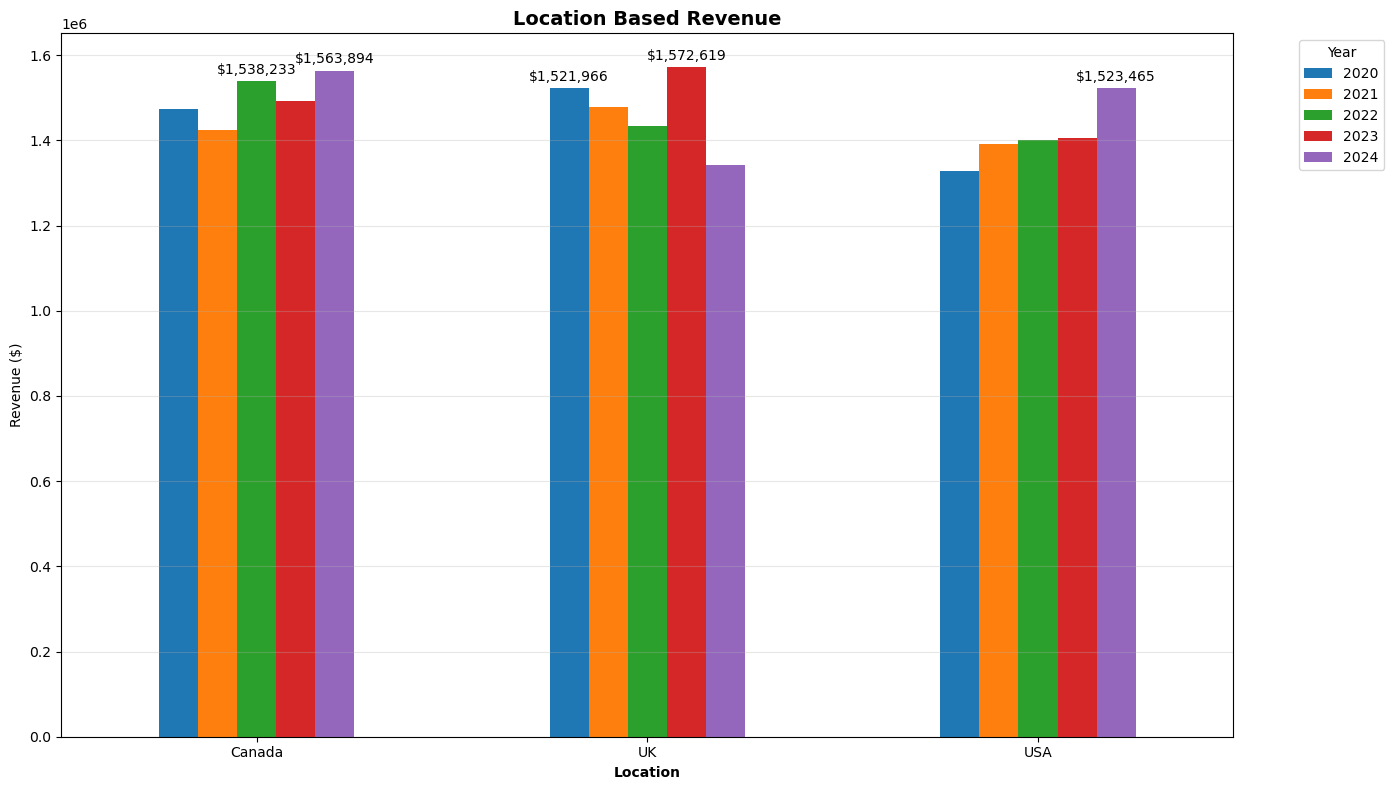

In [287]:
## Visualization
#1. Location with the most revenue
location_based_revenue.plot(kind='bar', figsize=(14, 8))
plt.title('Location Based Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Revenue ($)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')

for container in plt.gca().containers:
    plt.gca().bar_label(container, 
                       fmt=lambda x: f'${x:,.0f}' if x > 1520000 else '',
                       label_type='edge', 
                       padding=3)

plt.tight_layout()
plt.show()

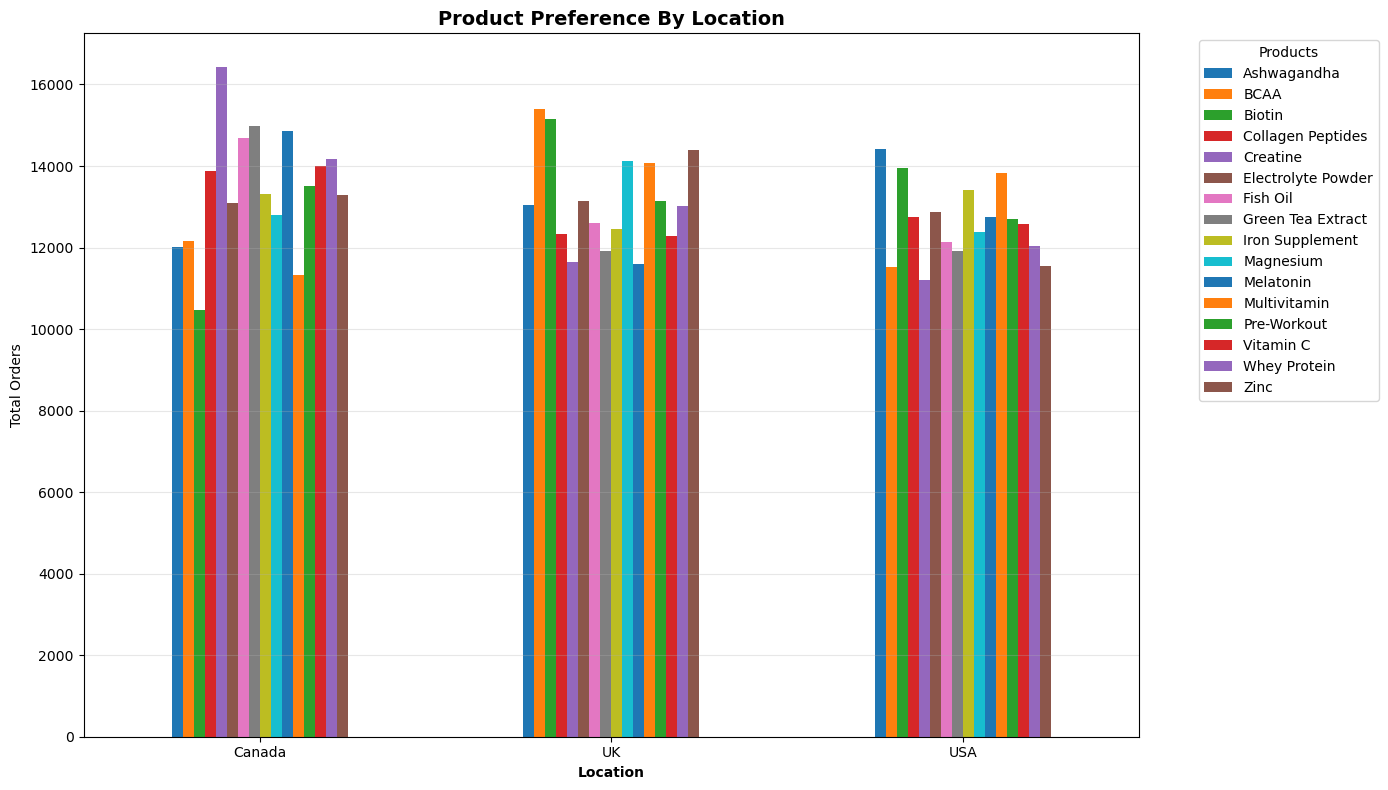

In [314]:
#2. Product preference by location
product_preference.plot(kind='bar', figsize=(14, 8))
plt.title('Product Preference By Location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Total Orders')
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

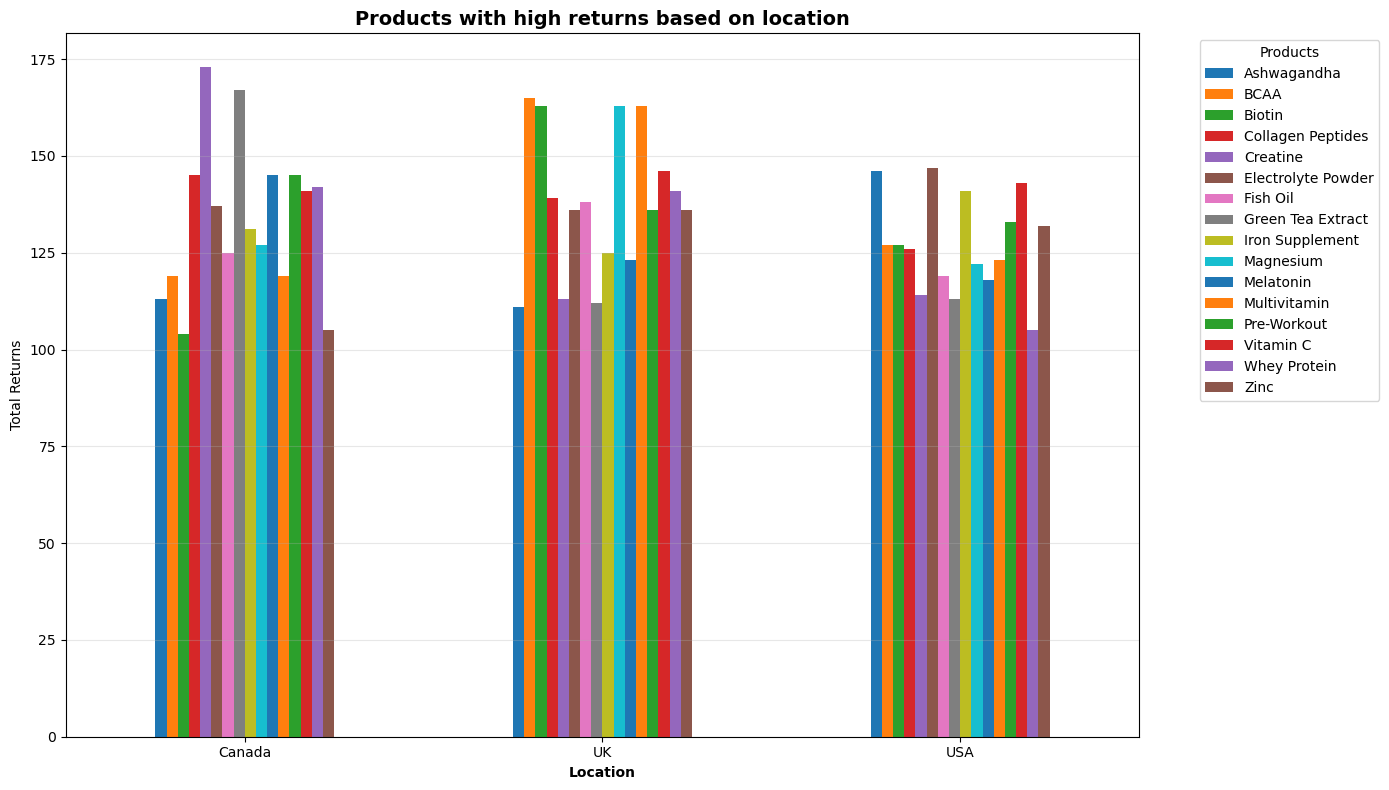

In [315]:
location_based_returns.plot(kind='bar', figsize=(14, 8))
plt.title('Products with high returns based on location', fontsize=14, fontweight='bold')
plt.xlabel('Location', fontweight = 'bold')
plt.ylabel('Total Returns')
plt.legend(title='Products', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

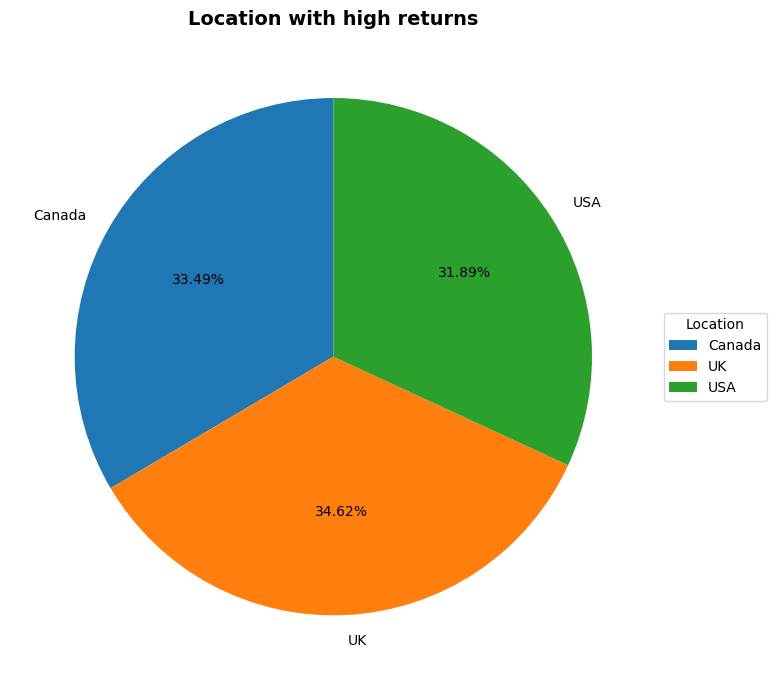

In [304]:
## 3.1 Location with high returns
location_returns_general.plot(kind='pie', y='Units_Returned', figsize=(12, 7), autopct='%.2f%%', startangle=90)
plt.title('Location with high returns', fontsize=14, fontweight='bold')
plt.legend(title='Location', bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()

Platform Performance
1. Which platform (Amazon, Walmart, iHerb) has the highest sales?
2. Do product preferences vary by platform?
3. How do return rates compare across platforms?


In [230]:
## 1. Platform with the highest sales
print('-' * 60)
print('Platform with highest sales')
print('-' * 60)

platform_sales = df_filtered.groupby('Platform')['Revenue'].sum().sort_values(ascending=False)
platform_sales_formatted = platform_sales.map(lambda x: f'{x:,.0f}')
print(platform_sales_formatted.to_string())
print('-' * 60)

------------------------------------------------------------
Platform with highest sales
------------------------------------------------------------
Platform
iHerb      7,481,215
Amazon     7,355,503
Walmart    7,053,970
------------------------------------------------------------


In [ ]:
## 1.2 Product preference by platform
print('-' * 60)
print('Product preference by platform')
print('-' * 60)

platform_sales_pref = df_filtered.groupby(['Platform', 'Product_Name'])['Revenue'].sum().unstack()
for platform in platform_sales_pref.index:
    top_products_platform = platform_sales_pref.loc[platform].idxmax()
    top_rev_products = platform_sales_pref.loc[platform].max()
    print(f'{platform}: {top_products_platform} - ${top_rev_products:,.0f}')
print('-' * 60)

------------------------------------------------------------
Product preference by platform
------------------------------------------------------------
Amazon: Fish Oil - $565,583
Walmart: Green Tea Extract - $521,190
iHerb: Iron Supplement - $544,253
------------------------------------------------------------


In [271]:
## 3. Return Rates across platforms
print('-' * 60)
print('Return Rates Across Platform')
print('-' * 60)
platform_stats = df_filtered.groupby('Platform').agg({
    'Units_Returned' : 'sum',
    'Units_Sold' : 'sum'
})

platform_stats['Return_Rate'] = (platform_stats['Units_Returned'] / platform_stats['Units_Sold']) * 100

for platform, rows in platform_stats.iterrows():
    print(f'{platform}: - {rows['Return_Rate']:.2f}%')
print('-' * 60)

------------------------------------------------------------
Return Rates Across Platform
------------------------------------------------------------
Amazon: - 1.04%
Walmart: - 1.00%
iHerb: - 1.01%
------------------------------------------------------------


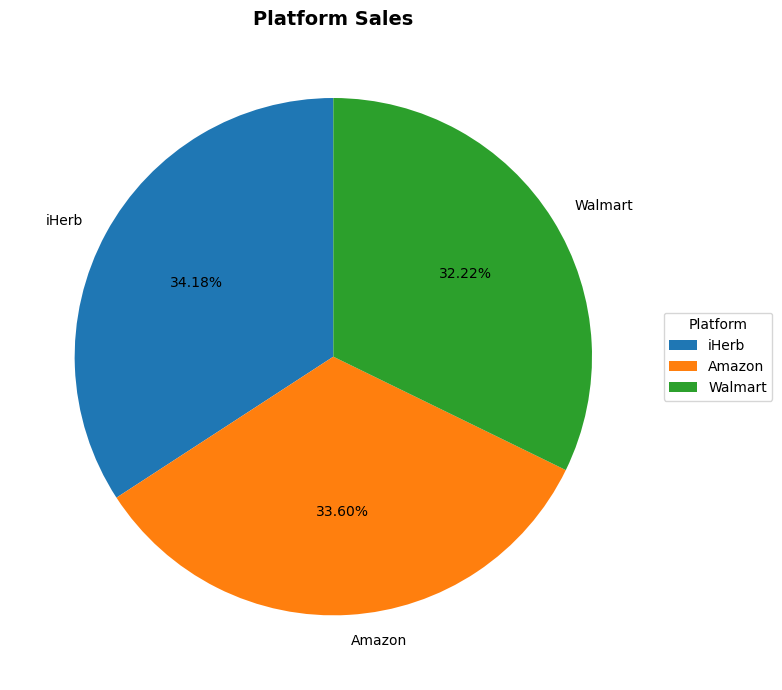

In [260]:
## Visualization
#1. Platform Sales
platform_sales.plot(kind='pie', y='Revenue', figsize=(12, 7), autopct='%.2f%%', startangle=90)
plt.title('Platform Sales', fontsize=14, fontweight='bold')
plt.legend(title='Platform', bbox_to_anchor=(1, 0.5), loc='center left')
plt.tight_layout()
plt.show()


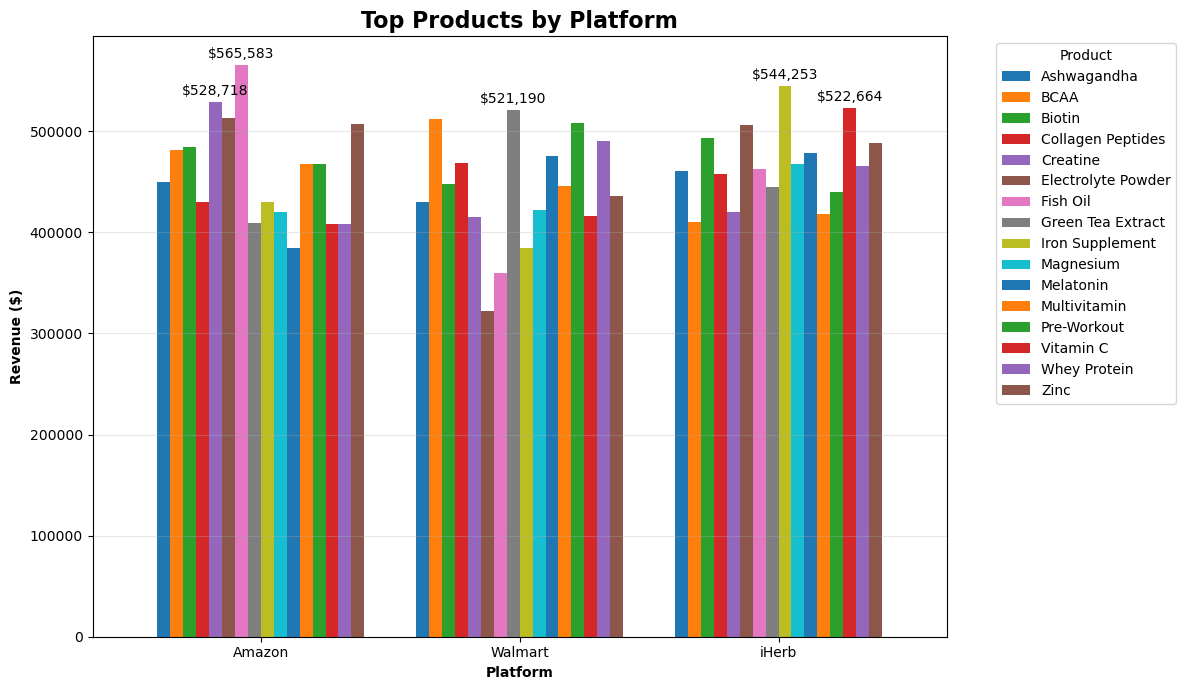

In [264]:
#2. Product preference per platform
platform_sales_pref.plot(kind='bar', figsize=(12, 7), width=0.8,)
plt.title(f'Top Products by Platform', fontsize=16, fontweight='bold')
plt.xlabel('Platform', fontweight='bold')
plt.ylabel('Revenue ($)', fontweight='bold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=0)
for container in plt.gca().containers:
    plt.gca().bar_label(container, 
                       fmt=lambda x: f'${x:,.0f}' if x > 520000 else '',
                       label_type='edge', 
                       padding=3)
plt.tight_layout()
plt.show()

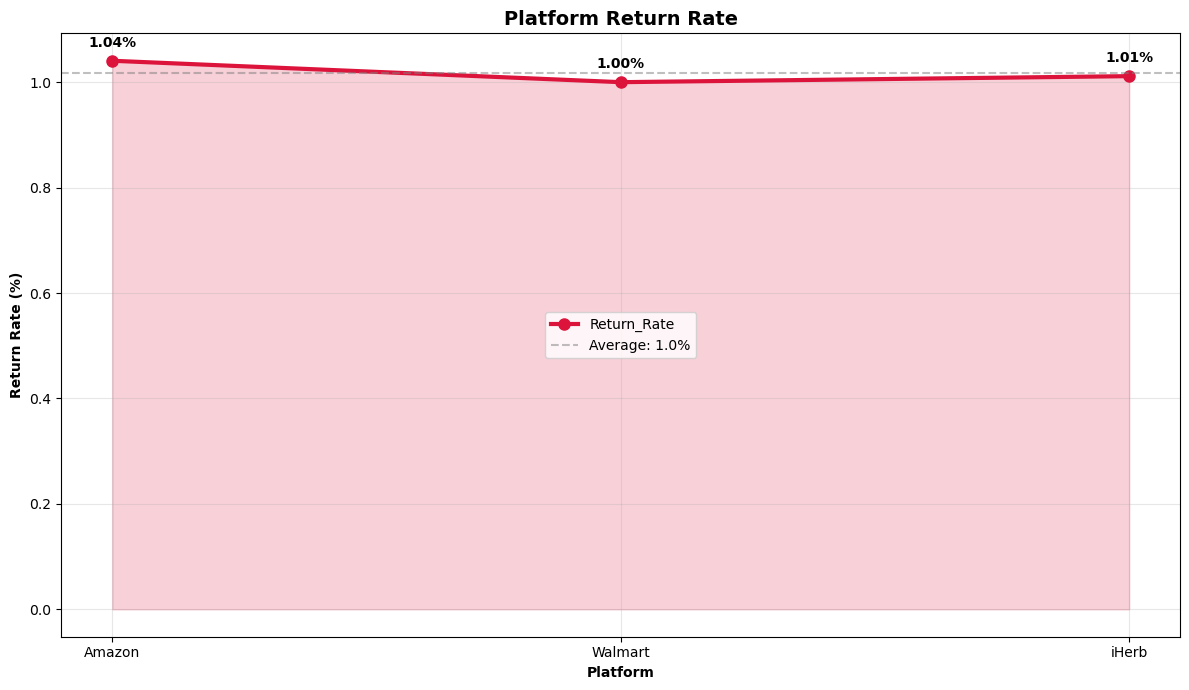

In [316]:
#3. Return Rate Platform
platform_stats['Return_Rate'].plot(
    kind='line',
    marker='o',
    linewidth=3,
    color='crimson',
    markersize=8,
    figsize=(12, 7),
    grid=True,
    title='Platform Return Rate',
    xlabel='Platform',
    ylabel='Return Rate (%)'
)

for platform, rate in zip(platform_stats.index, platform_stats['Return_Rate']):
    plt.annotate(f'{rate:.2f}%', 
                 xy=(platform, rate), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 fontweight='bold')


plt.fill_between(platform_stats.index, 
                 platform_stats['Return_Rate'], 
                 alpha=0.2, color='crimson')


plt.xlabel('Platform', fontweight='bold')
plt.ylabel('Return Rate (%)', fontweight='bold')
plt.title('Platform Return Rate', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(platform_stats.index)


avg_rate = platform_stats['Return_Rate'].mean()
plt.axhline(y=avg_rate, color='gray', linestyle='--', alpha=0.5, 
            label=f'Average: {avg_rate:.1f}%')
plt.legend()
plt.tight_layout()
plt.show()

Return Analysis
1. What is the overall return rate trend?
2. Do higher-priced items have higher return rates?


In [233]:
#1. Overall Return Rate Trend
print('-' * 60)
print('Overall Return Rate Trend')
print('-' * 60)

yearly_return_rate_stats = df_filtered.groupby('Year').agg({
    'Units_Sold': 'sum',
    'Units_Returned': 'sum'
})

yearly_return_rate_stats['Return_Rate'] = (yearly_return_rate_stats['Units_Returned'] / yearly_return_rate_stats['Units_Sold']) * 100

print("Year | Units Sold | Units Returned | Return Rate")
print("-" * 60)

for year, row in yearly_return_rate_stats.iterrows():
    print(f"{year} | {row['Units_Sold']:>10,} | {row['Units_Returned']:>14,} | {row['Return_Rate']:>10.2f}%")

print('-' * 60)

------------------------------------------------------------
Overall Return Rate Trend
------------------------------------------------------------
Year | Units Sold | Units Returned | Return Rate
------------------------------------------------------------
2020 |  124,657.0 |        1,282.0 |       1.03%
2021 |  124,701.0 |        1,251.0 |       1.00%
2022 |  125,167.0 |        1,241.0 |       0.99%
2023 |  125,038.0 |        1,278.0 |       1.02%
2024 |  127,707.0 |        1,332.0 |       1.04%
------------------------------------------------------------


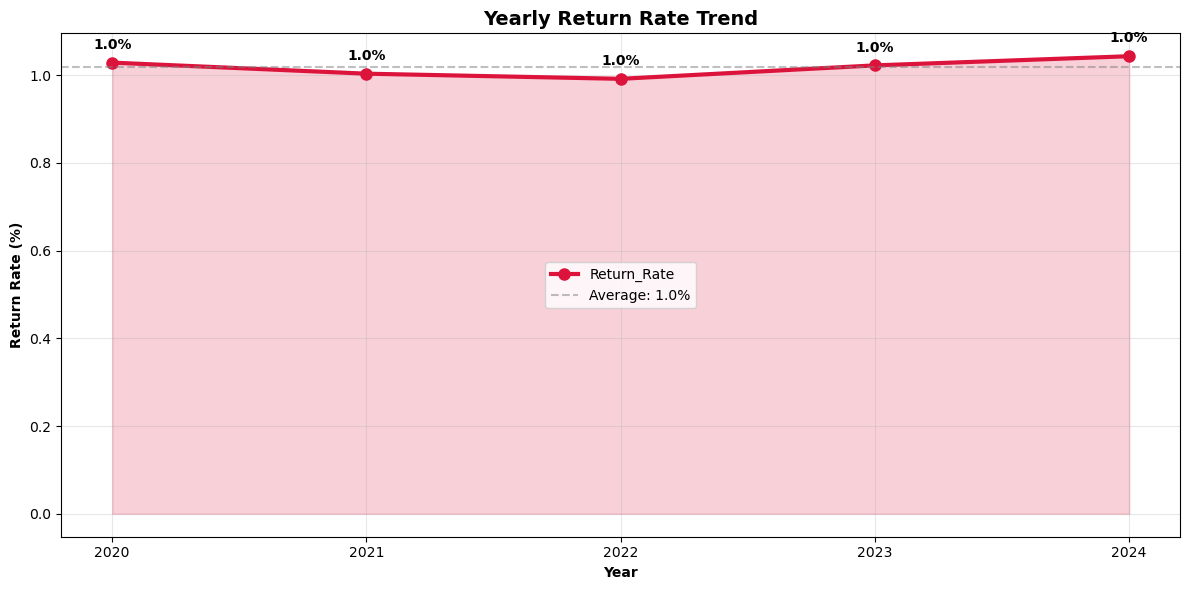

In [ ]:
## Return Rate Trend
yearly_return_rate_stats['Return_Rate'].plot(
    kind='line',
    marker='o',
    linewidth=3,
    color='crimson',
    markersize=8,
    figsize=(12, 6),
    grid=True,
    title='Yearly Return Rate Trend',
    xlabel='Year',
    ylabel='Return Rate (%)'
)


for year, rate in zip(yearly_return_rate_stats.index, yearly_return_rate_stats['Return_Rate']):
    plt.annotate(f'{rate:.1f}%', 
                 xy=(year, rate), 
                 xytext=(0, 10), 
                 textcoords='offset points',
                 ha='center', 
                 fontweight='bold')


plt.fill_between(yearly_return_rate_stats.index, 
                 yearly_return_rate_stats['Return_Rate'], 
                 alpha=0.2, color='crimson')


plt.xlabel('Year', fontweight='bold')
plt.ylabel('Return Rate (%)', fontweight='bold')
plt.title('Yearly Return Rate Trend', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(yearly_return_rate_stats.index)


avg_rate = yearly_return_rate_stats['Return_Rate'].mean()
plt.axhline(y=avg_rate, color='gray', linestyle='--', alpha=0.5, 
            label=f'Average: {avg_rate:.1f}%')
plt.legend()
plt.tight_layout()
plt.show()

In [234]:
#2. Do higher priced items have higher return rates
print('-' * 60)
print('Correlation of price and returns')
print('-' * 60)

product_stats = df_filtered.groupby('Product_Name').agg({
    'Units_Sold': 'sum',
    'Units_Returned': 'sum',
    'Price': 'mean'  
})

product_stats['Return_Rate'] = (product_stats['Units_Returned'] / product_stats['Units_Sold']) * 100

correlation = product_stats['Price'].corr(product_stats['Return_Rate'])
print(f"Correlation between Price and Return Rate: {correlation:.3f}")

if correlation > 0:
    print("Higher priced items tend to have HIGHER return rates")
elif correlation < 0:
    print("Higher priced items tend to have LOWER return rates")
else:
    print("No clear relationship between price and return rates")


------------------------------------------------------------
Correlation of price and returns
------------------------------------------------------------
Correlation between Price and Return Rate: -0.148
Higher priced items tend to have LOWER return rates


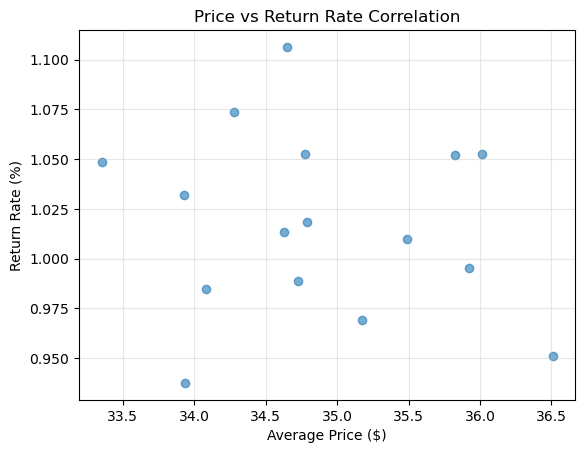

In [235]:
plt.scatter(product_stats['Price'], product_stats['Return_Rate'], alpha=0.6)
plt.xlabel('Average Price ($)')
plt.ylabel('Return Rate (%)')
plt.title('Price vs Return Rate Correlation')
plt.grid(True, alpha=0.3)
plt.show()